In [224]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns

In [225]:
pd.set_option('display.max_rows', 500)

In [226]:
df = pd.read_csv('kaggle_survey_2021_responses.csv')

C:\Users\Lenovo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.



In [227]:
# remove the first row
df = df.iloc[1:, :]

In [228]:
# we're interested in age, degree, experience, role, country, and annual salary
columns = ['Q1', 'Q3', 'Q4', 'Q5', 'Q6', 'Q25']
df = df[columns]

# rename the columns to be more easier
df.columns = ['Age', 'Country', 'Degree', 'Role', 'Experience', 'Salary']

In [229]:
# let's create some  functions that creates some plots for categorical vars
def plot_hist(data, cat_var, title, ordinal=False, order=None, orientation='v', xtick_angle = None):
    if orientation == 'h':
        fig = px.histogram(data, y= cat_var, histnorm='percent') 
    else:
        fig = px.histogram(data, x= cat_var, histnorm='percent')
    fig.update_layout(title=title, 
                          font_family="San Serif",
                          titlefont={'size': 20},
                          showlegend=True,
                          legend=dict(
                              orientation=orientation,
                              y=1.0, 
                              yanchor="top", 
                              x=1.0, 
                              xanchor="right"
                          )                 
                         )
    if ordinal:
        fig.update_xaxes(categoryorder='array', categoryarray=order)
        
    if xtick_angle:
        fig.update_xaxes(tickangle = xtick_angle)    
    fig.update_traces(marker_color=None, marker_line_color='white',
                          marker_line_width=1.5, opacity=0.99)
    fig.show()

def plot_pie(data, cat_var, title):    
    fig = px.pie(data, cat_var,title=title, hole=0.6)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
    fig.show()    

In [230]:
# let's replace all 40+ people
to_replace = ['40-44', '45-49', '50-54', '55-59', '60-69', '70+']
df.Age = df.Age.replace(to_replace, '40+')
df.Age.unique()

array(['40+', '22-24', '25-29', '18-21', '30-34', '35-39'], dtype=object)

In [231]:
# let's look at age dist
age_order = ['18-21', '22-24', '25-29', '30-34', '35-39', '40+']
plot_hist(df, 'Age', 'Age Distribution', ordinal=True, order=age_order)

In [232]:
# turrns out that there is a lot of young people (18-21) who are interested in DS and that could be a competition,
# since the younger people are more serious to learn than those who have learned and been working.
# It means that DS is a trending among young people and they might compete older ones

In [233]:
df.Degree

1        Bachelor’s degree
2          Master’s degree
3          Master’s degree
4          Doctoral degree
5          Doctoral degree
               ...        
25969    Bachelor’s degree
25970      Master’s degree
25971      Doctoral degree
25972      Master’s degree
25973    Bachelor’s degree
Name: Degree, Length: 25973, dtype: object

In [234]:
# let's look at degree dist
# let's first divide degrees into (below bachelor, bachelor, master, more than master)
df.Degree = df.Degree.replace(['Doctoral degree', 'Professional degree'], 'After Master')
df.Degree = df.Degree.replace(['No formal education past high school', 'Some college/university study without earning a bachelor’s degree', 'I prefer not to answer'], 'Before Bachelor')

df.Degree.unique()

array(['Bachelor’s degree', 'Master’s degree', 'After Master',
       'Before Bachelor', 'Professional doctorate'], dtype=object)

In [235]:
degrees_order = ['Before Bachelor', 'Bachelor’s degree', "Master's degree", "After Master"]
plot_hist(df, 'Degree', 'Degree Distribution', ordinal=True, order=degrees_order)
plot_pie(df.dropna(subset = ['Degree']), 'Degree', 'Degree Distribution')

In [236]:
# 75% of people have Bachelor's or Master's degrees (or they intend to have it soon).
# no much people out of university or school.
# I know there are some people doesn't attend university and became very successful, 
# but this is not the case for the majority of them.

In [237]:
# let's look at Experience
df.Experience.unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', 'I have never written code'], dtype=object)

In [238]:
# first let's make it more easier to work with
# will execlude those who never coding
df.Experience = df.Experience.replace('I have never written code', np.nan)

In [239]:
df.Experience.unique()

array(['5-10 years', '20+ years', '1-3 years', '< 1 years', '3-5 years',
       '10-20 years', nan], dtype=object)

In [240]:
ex_order = ['< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
plot_hist(df.dropna(subset=['Experience']), 'Experience', 'Experience distribution', ordinal=True, order=ex_order)

In [241]:
# as we can see around 50% are juniors or mid-level (5 years max of coding)
# just around 7% with 20+ years of experience (40+ years old)
# it seems that older people less than 40 years old are using kaggle more to gain expertise
df.Salary.dtype

dtype('O')

In [242]:
# Annual salary
df.Salary = df.Salary.replace('$0 ($USD)', np.nan)
df.Salary.isna().sum() /df.shape[0]

0.4074230932121819

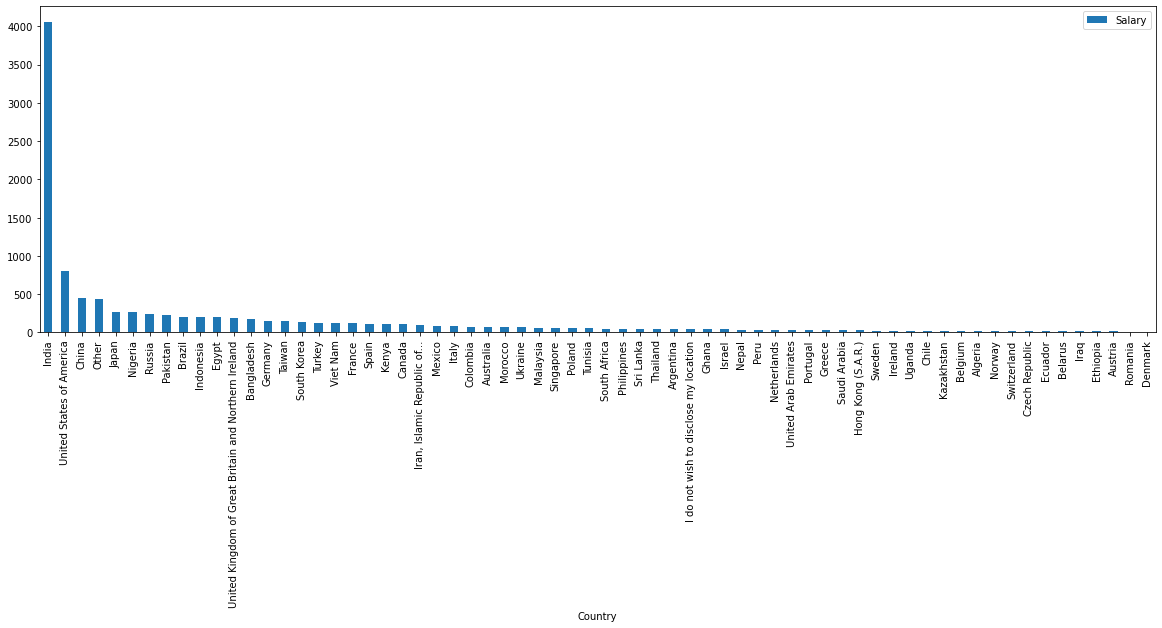

In [243]:
# it seems like 66% of respondants don't like to say their salary
# Does that have somthing with the culture or country
def s(group):
    return group.isna().sum()
pivot = pd.pivot_table(index=df['Country'], values=['Salary'], aggfunc=s ,data = df).sort_values('Salary', ascending=False)
plt.rcParams["figure.figsize"] = [20, 6]
pivot.plot(kind='bar')
# pivot.plot.bar(x=pivot.index, y=pivot.values)
plt.show()

# seems like india has a huge number of respondants that don't like to clear how much they earn

In [246]:
# let's make it a lot more easier by dividing annual salaries into four ranges <1000, 1000-9,999, 10,000-99,999, 100,000<=

# <1000
df['Salary'] = df['Salary'].replace(['$0-999'], '< $1000')
# 1000 - 9,999
df['Salary'] = df['Salary'].replace(['1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999'], '1,000-9,999')
# 10,000 - 99,999
df['Salary'] = df['Salary'].replace(['10,000-14,999',
               '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999',
               '70,000-79,999', '80,000-89,999', '90,000-99,999'], '10,000-99,999')
# > 100,000
df['Salary'] = df['Salary'].replace(['100,000-124,999', '125,000-149,999', '150,000-199,999', '200,000-249,999',
               '250,000-299,999', '300,000-499,999', '$500,000-999,999', '>$1,000,000'], '> $100,000')

In [247]:
df['Salary'].value_counts()

10,000-99,999    6462
1,000-9,999      3631
< $1000          3369
> $100,000       1929
Name: Salary, dtype: int64

In [250]:
s_order = ['<1000', '1,000-9,999', '10,000-99,999', '> $100,000']
plot_hist(df.dropna(subset=['Salary']), 'Salary', 'Annual Salary distribution', ordinal=True, order=s_order, orientation='h')
plot_pie(df.dropna(subset = ['Salary']), 'Salary', 'Annual Salary Distribution')

In [ ]:
# around 55% of the kagglers get more than $10000 dollars and 42% of them in the range $10000 - 99999

### Some insights
- Data sciense is getting more popular among young people
- Most of data scientists have a degree less than Master's degree
- Most of the kagglers have 3-5 years of coding
- It seems like kagglers earn much money (It could vary by country, experience , and education level)